In [17]:
import calculation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, norm
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import scale
from scipy.special import expit
from IPython.display import display, Markdown
!jupyter nbconvert --to slides presentation.ipynb --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook presentation.ipynb to slides
[NbConvertApp] Writing 1099516 bytes to presentation.slides.html


<font size = "8">Elektrauto AG</font>

<i> HWR Berlin, Wintersemster 2023-2024</i>

<i> Robin Herwegh, Jasper Hadre ,Florian Liebaert </i>
    

<font size = "6">1. Wie viele Autos wurden verkauft?</font>

In [351]:
print("{:,.0f}".format(calculation.q1).replace(",","."))

1.099


<font size = "6">2. Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?</font>

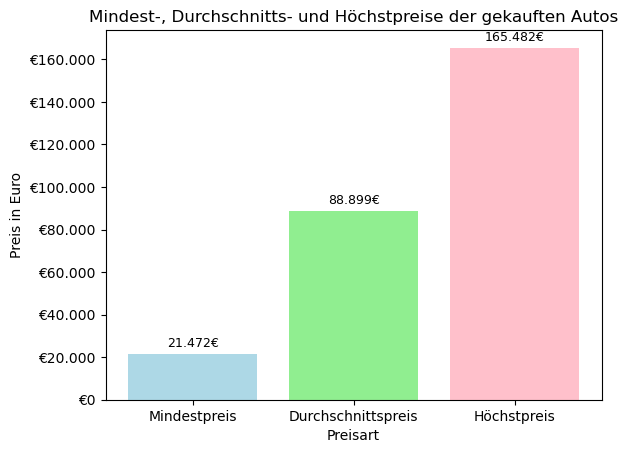

In [352]:
# Kategorien

categories = ['Mindestpreis', 'Durchschnittspreis', 'Höchstpreis']

prices = [calculation.q2_2, calculation.q2_3, calculation.q2_1]


fig, ax = plt.subplots()


# Balkendiagramm

bars = ax.bar(categories, prices, color=['lightblue', 'lightgreen', 'pink'])

ax.set_xlabel('Preisart') 
ax.set_ylabel('Preis in Euro')
ax.set_title('Mindest-, Durchschnitts- und Höchstpreise der gekauften Autos')


# Achsenbeschriftung (Währung, Trennzeichen)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x):,}'.replace(',', '.')))# Beschriftung € Durschnittsverkaufspreis


# Hinzufügen der genauen Werte über die Balken 
for bar in bars:     
    height = bar.get_height()     
    ax.annotate('{:,.0f}€'.format(height).replace(",","."),                 
                xy=(bar.get_x() + bar.get_width() / 2, height),                 
                xytext=(0, 3),  

# 3 Punkte vertikaler Versatz                 
                textcoords="offset points",                 
                ha='center', va='bottom', fontsize=9) 
plt.show()

<font size = "6">3. Wie hoch war der Gesamtumsatz?
</font>

In [353]:
print("{:,.0f}€".format(calculation.q3).replace(",","."))

97.700.084€


In [354]:
calc_04 = calculation.q4.reset_index()

In [355]:
calc_05 = calculation.q5

<font size = "6">4,5. Wie viele Autos wurden pro Bundesland verkauft und was war der durschnittliche Umsatz?</font>


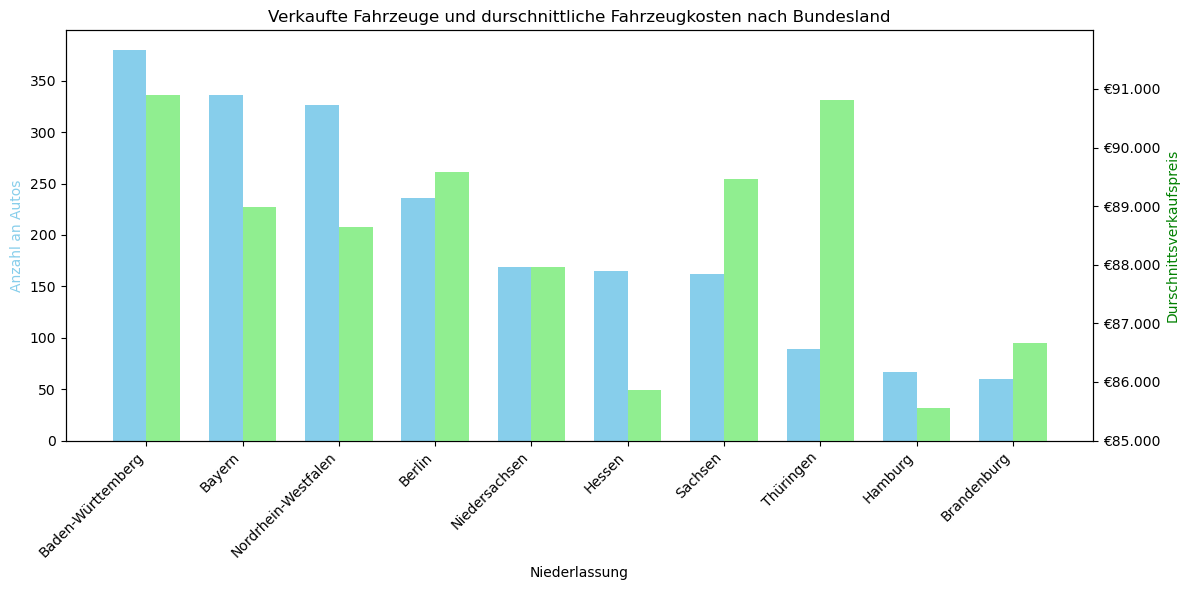

In [356]:
# Erstellen von Bereichsindizes für die Balkendiagramme
r1 = np.arange(len(calc_04))
r2 = [x + 0.35 for x in r1]

# Erstellen eines Subplots und Festlegen der Größe
fig, ax1 = plt.subplots(figsize=(12, 6))

# Erstellen des Balkendiagramms für verkaufte Fahrzeuge
ax1.bar(r1, calc_04.iloc[:, 1], color='skyblue',width=0.35, label='Verkaufte Fahrzeuge')

# Beschriftung der x-Achse und y-Achse
ax1.set_xlabel('Niederlassung')
ax1.set_ylabel('Anzahl an Autos', color='skyblue')

# Setzen der x-Achsen-Ticks und Beschriftung
plt.xticks([r + 0.35 / 2 for r in range(len(calc_04))], calc_04.iloc[:, 0])
ax1.set_xticklabels(calc_04.iloc[:, 0], rotation=45, ha="right")

# Erstellen einer zweiten y-Achse für den durchschnittlichen Verkaufspreis
ax2 = ax1.twinx()
ax2.bar(r2, calc_05[calc_04.iloc[:, 0]], color='lightgreen',width=0.35, label='Umsatz')

# Beschriftung der zweiten y-Achse
ax2.set_ylabel('Durschnittsverkaufspreis', color='green')

# Titel des Plots hinzufügen
plt.title('Verkaufte Fahrzeuge und durschnittliche Fahrzeugkosten nach Bundesland')

# Festlegen des y-Achsenbereichs für den durchschnittlichen Verkaufspreis
ax2.set_ylim(85000, 92000)
plt.yticks(range(85000, 92000, 1000))

# Formatierung der y-Achse für den durchschnittlichen Verkaufspreis
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x):,}'.replace(',', '.')))# Beschriftung € Durschnittsverkaufspreis und trennung mit . für Zahlen über 1000

# layout an format anpassen
plt.tight_layout()  
plt.show()

<font size = "6">6. Haben mehr Frauen oder mehr Männer unsere Autos gekauft? </font>

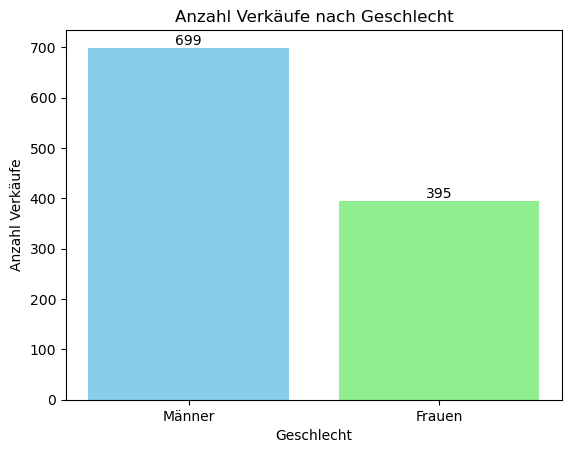

In [357]:
# Kategorien
categories = ['Männer', 'Frauen']


# Erstellen des Balkendiagramm
bars = plt.bar(categories, [calculation.q6[1.0], calculation.q6[0.0]], color=['skyblue', 'lightgreen'])
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl Verkäufe')
plt.title('Anzahl Verkäufe nach Geschlecht')


# Balkenbeschriftung
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')
 

plt.show()

<font size = "6">7,8,9. Wie hoch ist das Durchschnittsalter der Besucher, Kunden und männliche Kunden?</font>

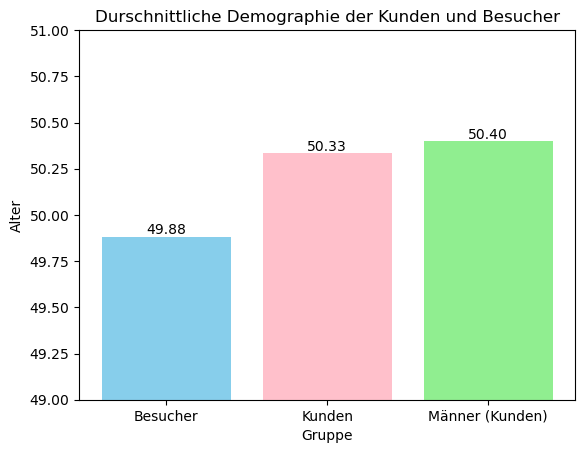

In [358]:
# Kategorien
categories = ['Besucher','Kunden',"Männer (Kunden)"]
# Erstellen des Balkendiagramm
bars = plt.bar(categories, [calculation.q8,calculation.q7, calculation.q9], color=['skyblue', 'pink',"lightgreen"])

plt.xlabel('Gruppe') 
plt.ylabel('Alter') 
plt.title('Durschnittliche Demographie der Kunden und Besucher')
plt.ylim(49, 51)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

<font size = "6">10. Wie hoch ist das Durchschnittseinkommen unserer Kunden und wie vergleicht er sich mit den Durschnittspreis der verkauften Autos?</font>

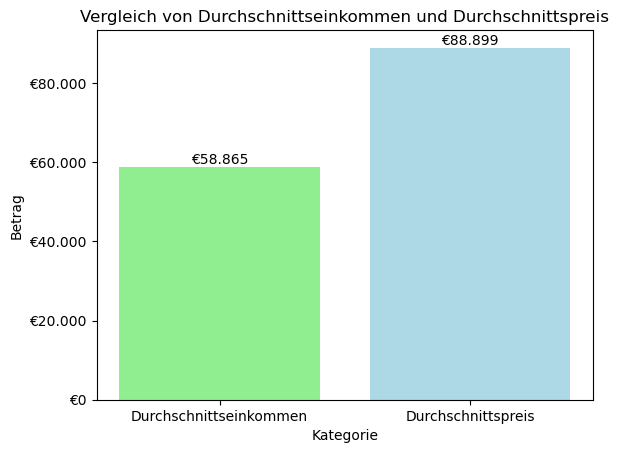

In [359]:
# Kategorien

categories = ['Durchschnittseinkommen', 'Durchschnittspreis']


# Balkendiagramm

bars = plt.bar(categories, [calculation.q10, calculation.q2_3], color=['lightgreen', 'lightblue'])

plt.xlabel('Kategorie')

plt.ylabel('Betrag')

plt.title('Vergleich von Durchschnittseinkommen und Durchschnittspreis')


# Hinzufüge die genauen Werte auf die Balken

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'€{yval:,.0f}'.replace(",", "."), ha='center', va='bottom')
    
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x):,}'.replace(",", ".")))# Beschriftung € Durschnittsverkaufspreis



plt.show() 

<font size = "5">11.Wie hoch ist die Korrelation zwischen den Variablen Alter, Einkommen, Preis und Zeit für Kunden?</font>

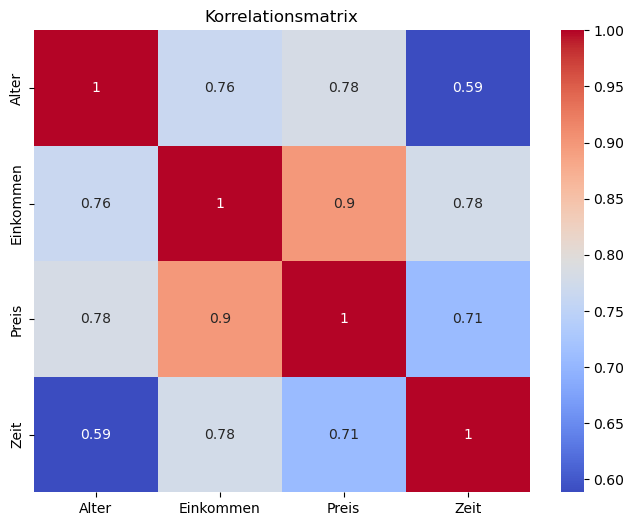

In [360]:
# Korrelationkoeffiziente extrahieren
q11_1 = calculation.q11_1[0]
q11_2 = calculation.q11_2[0]
q11_3 = calculation.q11_3[0]
q11_4 = calculation.q11_4[0]
q11_5 = calculation.q11_5[0]
q11_6 = calculation.q11_6[0]

# Matrix für die Korrelation herstellen
corr_matrix = np.array([
    [1, q11_2, q11_1, q11_3],
    [q11_2, 1, q11_5, q11_4],
    [q11_1, q11_5, 1, q11_6],
    [q11_3, q11_4, q11_6, 1]
])

# Labels adden
labels = ['Alter', 'Einkommen', 'Preis',"Zeit"]

# Heatmap erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Korrelationsmatrix')
plt.show()

<font size = "6">12. Wie ist die Variable Zeit verteilt?</font>

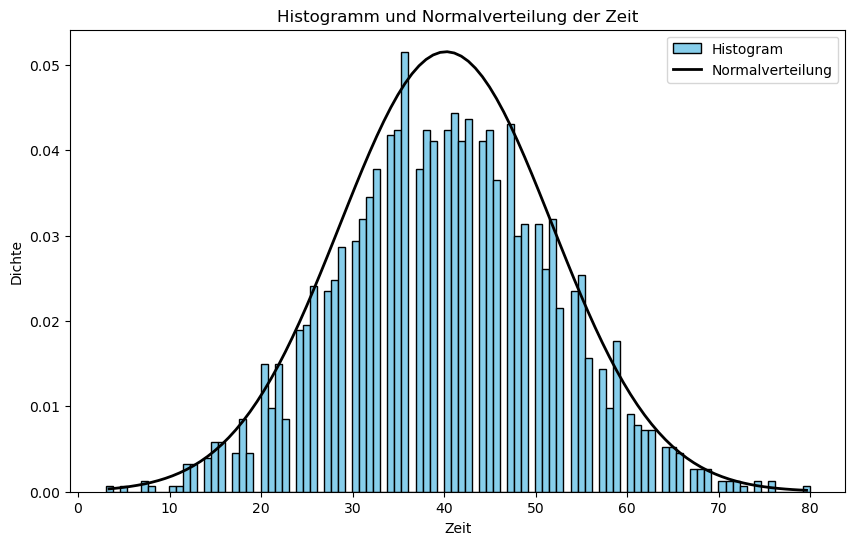

In [3]:

plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(calculation.data['Zeit'], bins=100, color='skyblue', edgecolor='black', density=True, label='Histogram')

# Berechne Mittelpunkte der Bins
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Füge Normalverteilungslinie hinzu (angepasste Amplitude)
mean, std = calculation.data['Zeit'].mean(), calculation.data['Zeit'].std()
p = norm.pdf(bin_centers, mean, std) * (np.max(counts) / np.max(norm.pdf(bin_centers, mean, std)))  # Amplitude anpassen
plt.plot(bin_centers, p, 'k', linewidth=2, label='Normalverteilung')

# Beschriftungen und Titel
plt.title('Histogramm und Normalverteilung der Zeit')
plt.xlabel('Zeit')
plt.ylabel('Dichte')
plt.legend()

# Zeige das Diagramm
plt.show()

<font size = "6">13. Wie viele Kunden haben ein Kredit bei der Bank genommen?</font>

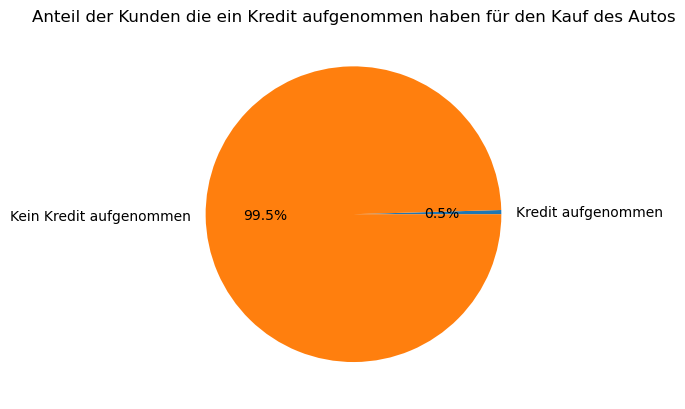

In [362]:
# Importieren von den Daten für das Piechart
q13_1 = calculation.q_13 / calculation.data.dropna(subset=['Preis']).count()[4] * 100
q13_2 = (calculation.data.dropna(subset=['Preis']).count()[4] - q13_1) / calculation.data.dropna(subset=['Preis']).count()[4] * 100
# Piechart erstellen mit labels und Prozentsätze
plt.pie([q13_1,q13_2],labels=["Kredit aufgenommen","Kein Kredit aufgenommen"], autopct='%1.1f%%')
plt.title("Anteil der Kunden die ein Kredit aufgenommen haben für den Kauf des Autos")
plt.show()

<font size = "6">14.Sozioökonomischen Merkmale der Kunden, die den Kaufpreis beeinflussen</font>

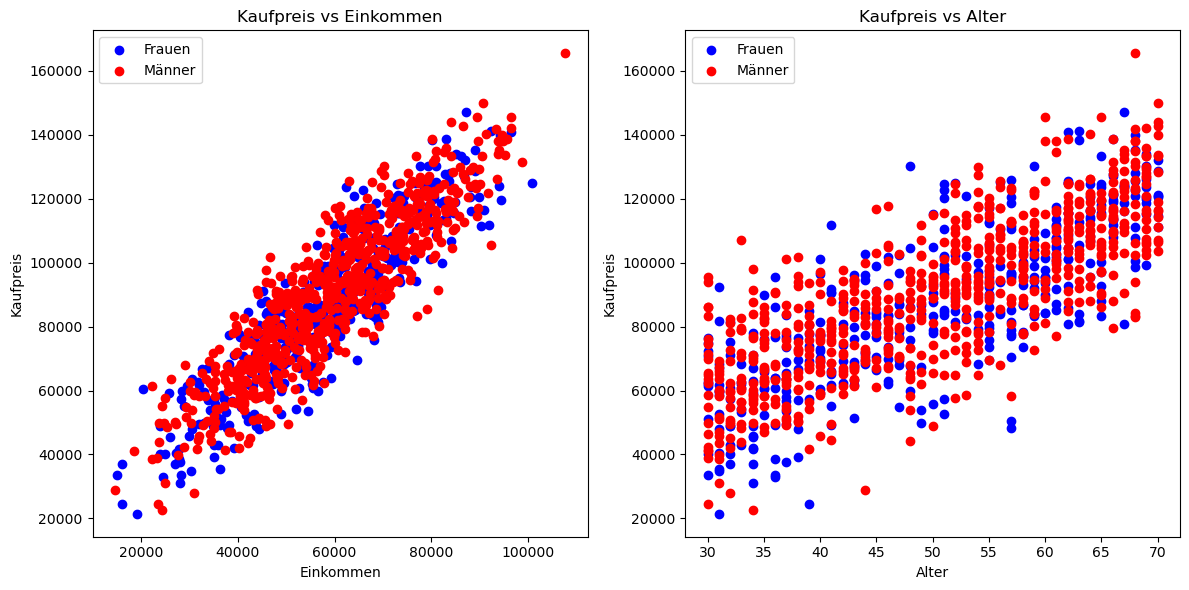

In [363]:
#Daten organisieren
df_filtered2 = calculation.data.dropna()
y = df_filtered2['Preis']
X = df_filtered2[['Einkommen', 'Alter']]
Geschlecht = df_filtered2["Geschlecht"]
# Scatterplot für 'Einkommen' vs 'Preis'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 Reihe, 2 Spalten, 1. Plot

plt.scatter(X['Einkommen'][Geschlecht == 0], y[Geschlecht == 0], color="blue", label='Frauen')
plt.scatter(X['Einkommen'][Geschlecht == 1], y[Geschlecht == 1], color="red", label='Männer')

plt.title('Kaufpreis vs Einkommen')
plt.xlabel('Einkommen')
plt.ylabel('Kaufpreis')
plt.legend()

# Scatterplot für 'Alter' vs 'Preis'
plt.subplot(1, 2, 2)  # 1 Reihe, 2 Spalten, 2. Plot

plt.scatter(X['Alter'][Geschlecht == 0], y[Geschlecht == 0], color="blue", label='Frauen')
plt.scatter(X['Alter'][Geschlecht == 1], y[Geschlecht == 1], color="red", label='Männer')


plt.title('Kaufpreis vs Alter')
plt.xlabel('Alter')
plt.ylabel('Kaufpreis')
plt.legend()

plt.tight_layout()
plt.show()

<font size = "6">15. Prognostizierung von Kaufpreisen anhand sozioökonomischer Merkmale</font>

<font size = "4">Prognostizierung von dem Kaufpreis eines Autos für ein männlichen Kunde im Alter von 32 Jahren mit einem Einkommen von 30.000:</font>

In [364]:
print("{:,.0f}€".format(calculation.case1).replace(",","."))

50.277€


<font size = "4">Prognostizierung von dem Kaufpreis eines Autos für ein männlichen Kunde im Alter von 51 Jahren mit einem Einkommen von 54.000:</font>

In [365]:
print("{:,.0f}€".format(calculation.case2).replace(",","."))

84.815€


<font size = "5">16. Welche Variable beeinflusst den Preis des Autos am
meisten?</font>

In [16]:
# Abhängige Variable definieren: Preis
y3 = calculation.df_filtered2['Preis']

# Unabhängige Variablen definieren:
X3 = calculation.df_filtered2[['Einkommen', 'Alter', 'Geschlecht']]

# Standardisieren der unabhängigen Variablenn (für standardisierte koeffizienten)
X_scaled = scale(X3)

# Hinzufügen einer Konstanten als Intercept in der Regression
X_scaled = sm.add_constant(X_scaled)

# Modell aufrufen
model3 = sm.OLS(y3, X_scaled)

# Modell ausrechnen
results3 = model3.fit()

# Ausgabe der standardisierten Regressionskoeffizienten
#Für einkommen:
print(" -> Einkommen")
print(results3.params['x1'])
#Für Alter:
print(" -> Alter")
print(results3.params['x2'])
#Für Geschlecht
print(" -> Geschlecht")
print(results3.params['x3'])
print("Das Einkommen beeinflusst den Kaufpreis am meisten!")

 -> Einkommen
17522.15230204932
 -> Alter
5691.303610224638
 -> Geschlecht
1000.752843882048
Das Einkommen beeinflusst den Kaufpreis am meisten!


<font size = "4">Wie haben wir die Frage beantwortet?</font>

<font size="3" face="Courier New, monospace">

<span style="font-size: 4; font-weight: bold;"> Question 16</span><br>

<span style="color: #0000FF;"># # Abhängige Variable definieren: Preis</span><br>
<span style="color: #008000;">y3 = calculation.df_filtered2['Preis']</span><br>

<span style="color: #0000FF;"># Unabhängige Variablen definieren:</span><br>
<span style="color: #008000;">X3 = calculation.df_filtered2[['Einkommen', 'Alter', 'Geschlecht']]</span><br>

<span style="color: #0000FF;">#Standardisieren der unabhängigen Variablenn (für standardisierte koeffizienten)</span><br>
<span style="color: #008000;">X_scaled = scale(X3)</span><br>

<span style="color: #0000FF;"># Hinzufügen des Intercept für die Regression</span><br>
<span style="color: #008000;">X_scaled = sm.add_constant(X_scaled)</span><br>

<span style="color: #0000FF;">#Modell aufrufen</span><br>
<span style="color: #008000;">model3 = sm.OLS(y3, X_scaled)</span><br>

<span style="color: #0000FF;"># Modell fitten lassen</span><br>
<span style="color: #008000;">results3 = model3.fit()</span><br>


<font size = "6">17,18. Kaufwahrscheinlichkeit für Auto-Modelle</font>

In [366]:
# Ausgabe der standardisierten Regressionskoeffizienten
#Für einkommen:
print(results.params['x1'])
#Für Alter:
print(results.params['x2'])
#Für Geschlecht
print(results.params['x3'])
print("Das Einkommen beeinflusst den Kaufpreis am meisten!")

Einkommen Koeffizient: 0.00037571821710603544

Alter Koeffizient: 0.030817513000801995

Geschlecht Koeffizient: 0.05748855351370792

Zeit Koeffizient: 0.025968474919890797


<font size = "4">Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem
Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, ein Auto kauft:</font>

In [367]:
print("{:,.0f}".format(calculation.case3).replace(",",".") + "%")

33%


<font size = "4">Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde
mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, ein Auto kauft</font>

In [368]:
print("{:,.0f}".format(calculation.case4).replace(",",".") + "%")

43%


<font size = "4">Wie haben wir die Koeffiziente ausgerechnet?</font>

<span style="font-size: 4; font-weight: bold;"> Frage 17</span><br>

<font size="3" face="Courier New, monospace">

<span style="color: #0000FF;"># Hinzufügen einer weiteren Spalte, 'Kauf getätigt' als Dummy Variable. Diese ist 1, wenn ein Auto gekauft wurde, und 0, wenn nicht.</span><br>
<span style="color: #008000;">data['Kauf_getaetigt'] = data['Preis'].notna().astype(int)</span><br>

<span style="color: #0000FF;"># Ersetzen der NA Einträge in der Spalte Preis mit Null, da sonst alle Besucher im nächsten Schritt gelöscht werden</span><br>
<span style="color: #008000;">data['Preis'] = data['Preis'].fillna(0)</span><br>

<span style="color: #0000FF;"># Löschen aller Einträge, die NA enthalten, da diese die Funktion sm.logit() stören und einen error hervorrufen</span><br>
<span style="color: #008000;">df_filtered3 = data.dropna()</span><br>

<span style="color: #0000FF;"># Unabhängige Variablen (X) definieren</span><br>
<span style="color: #008000;">X = df_filtered3[['Einkommen', 'Zeit', 'Geschlecht', 'Alter']]</span><br>

<span style="color: #0000FF;"># Hinzufügen einer Konstanten für den Intercept in der Regression</span><br>
<span style="color: #008000;">X = sm.add_constant(X)</span><br>

<span style="color: #0000FF;"># Abhängige Variable definieren (binär)</span><br>
<span style="color: #008000;">y = df_filtered3['Kauf_getaetigt']</span><br>

<span style="color: #0000FF;"># Modell aufrufen (logistisch)</span><br>
<span style="color: #008000;">model = sm.Logit(y, X)</span><br>

<span style="color: #0000FF;"># Modell fitten</span><br>
<span style="color: #008000;">results = model.fit()</span><br>

<span style="color: #0000FF;"># Ausgabe der logistischen Regressionskoeffizienten</span><br>
<span style="color: #008000;">print(results.summary())</span>


<span style="font-size: 4; font-weight: bold;"> Frage 18</span><br><br>

<font size="3" face="Courier New, monospace">
<span style="color: #008000;">intercept = results.params['const']  <span style="color: #0000FF;"># Intercept</span><br>
coefficient_einkommen = results.params['Einkommen']  <span style="color: #0000FF;"># Koeffizient für 'Einkommen'</span><br>
coefficient_alter = results.params['Alter']  <span style="color: #0000FF;"># Koeffizient für 'Alter'</span><br>
coefficient_geschlecht = results.params['Geschlecht']  <span style="color: #0000FF;"># Koeffizient für 'Geschlecht'</span><br>
coefficient_zeit = results.params['Zeit']  <span style="color: #0000FF;"># Koeffizient für 'Zeit'</span></span><br><br>

<span style="color: #0000FF;"># Question 18 -> Errechnung der Wahrscheinlichkeiten für die beiden gegebenen Fälle</span><br>
<span style="color: #008000;">case3 = intercept + (coefficient_alter*32) + (coefficient_einkommen*30000) + (coefficient_geschlecht*1) + (coefficient_zeit*30)<br>
print(case3)<br><br>
case4 = intercept + (coefficient_alter*51) + (coefficient_einkommen*54000) + (coefficient_geschlecht*1) + (coefficient_zeit*45)<br>
print(case4)</span>


<font size = "6">19. Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen?</font>

<font size = "4">1. Importieren der Datensätze:</font>

<font size="3" face="Courier New, monospace">

<span style="color: #0000FF;"># Defining the Panda dataframe, (using "delimiter" because the csv file imports the values with a semicolon instead of a comma)</span><br>
<span style="color: #008000;">kunden = pd.read_csv("kunden.csv", delimiter=";", index_col=5)<br>
besucher = pd.read_csv("besucher.csv", delimiter=";", index_col=4)</span><br><br>

<span style="color: #0000FF;"># Creating a geo.csv file from geo.txt</span><br>
<span style="color: #008000;">geo_txt = pd.read_csv("geo.txt", delimiter= "\s+")<br>
geo_txt.to_csv("geo.csv", index=False)<br>
geo = pd.read_csv("geo.csv", index_col=0)</span><br><br>

<span style="color: #0000FF;"># Converting the , to . in the "kunden" dataframe and changing the type to integer</span><br>
<span style="color: #008000;">kunden = kunden.replace(",", ".", regex=True)<br>
kunden['Einkommen'] = kunden['Einkommen'].astype(float).round().astype(int)<br>
print(kunden)</span><br><br>

<span style="color: #0000FF;"># Converting the , to . in the "besucher" dataframe and changing the type to integer</span><br>
<span style="color: #008000;">besucher = besucher.replace(",", ".", regex=True)<br>
besucher['Einkommen'] = besucher['Einkommen'].astype(float).round().astype(int)<br>
print(besucher)</span>



<font size = "4">2. Überprüfen der Datensätze und Korigieren des Datensatzes Geo:</font>

<font size="3" face="Courier New, monospace">

<span style="color: #0000FF;"># Cleaning out geo:</span><br>
<span style="color: #0000FF;"># 1. checking all unique values to see if there are inconsistencies</span><br>
<span style="color: #008000;">print(geo["Niederlassung"].unique())</span><br><br>

<span style="color: #0000FF;"># 2. replacing the values so each "Bundesland" only has one value associated to it</span><br>
<span style="color: #008000;">geo = geo.replace("NRW", "Nordrhein-Westfalen", regex=True)<br>
geo = geo.replace("BERLIN", "Berlin", regex=True)<br>
geo = geo.replace("Berlin-Charlottenburg", "Berlin", regex=True)<br>
geo = geo.replace("Berlin-Mitte", "Berlin", regex=True)<br>
geo = geo.replace("Düsseldorf", "Nordrhein-Westfalen", regex=True)</span><br><br>

<span style="color: #0000FF;"># 3. checking all unique values again to make sure all inconsistencies are fixed</span><br>
<span style="color: #008000;">print(geo["Niederlassung"].unique())</span>



<font size = "4">3. Überprüfen der Datensätze und Korigieren des Datensatzes Kunden:</font>

<font size="3" face="Courier New, monospace">

<span style="color: #0000FF;"># Cleaning out kunden:</span><br>
<span style="color: #0000FF;"># 1. checking whether there are extreme values with scatter plots:</span><br>
<span style="color: #008000;">plt.scatter(range(len(kunden)), kunden["Alter"])<br>
plt.show()<br>
plt.clf()</span><br><br>
<span style="color: #008000;">plt.scatter(range(len(kunden)), np.log(kunden["Einkommen"]))<br>
plt.show()<br>
plt.clf()</span><br><br>
<span style="color: #008000;">plt.scatter(range(len(kunden)), kunden["Preis"])<br>
plt.show()<br>
plt.clf()</span><br><br>
<span style="color: #008000;">plt.scatter(range(len(kunden)), kunden["Geschlecht"])<br>
plt.show()<br>
plt.clf()</span><br><br>
<span style="color: #008000;">plt.scatter(range(len(kunden)), kunden["Zeit"])<br>
plt.show()<br>
plt.clf()</span><br><br>
<span style="color: #0000FF;"># 2. We have found 2 outliers in the column "Alter" and 3 outliers in the column "Einkommen", now we will remove the outliers:</span><br>
<span style="color: #008000;">kunden = kunden[(kunden["Alter"] < 80) & (kunden["Einkommen"] > 0) & (kunden["Einkommen"] < 1000000000)]</span>



<font size = "4">4. Überprüfen der Datensätze und Korigieren des Datensatzes Besucher:</font>

<font size="3" face="Courier New, monospace">

<span style="color: #0000FF;"># Cleaning out besucher</span><br>
<span style="color: #0000FF;"># 1. checking whether there are extreme values with scatter plots:</span><br>
<span style="color: #008000;">besucher = besucher.sort_values("KundeNr")<br><br>
plt.scatter(range(len(besucher)), besucher["Alter"])<br>
plt.show()<br>
plt.clf()</span><br><br>

<span style="color: #008000;">plt.scatter(range(len(besucher)), np.log(pd.to_numeric(besucher["Einkommen"])))<br>
plt.show()<br>
plt.clf()</span><br><br>

<span style="color: #008000;">plt.scatter(range(len(besucher)), besucher["Geschlecht"])<br>
plt.show()<br>
plt.clf()</span><br><br>

<span style="color: #008000;">plt.scatter(range(len(besucher)), besucher["Zeit"])<br>
plt.show()<br>
plt.clf()</span><br><br>

<span style="color: #0000FF;"># 2. Did not find any outliers. All data is cleaned</span>


<font size = "4">5. Zusammenführen der Datensätze und letzte Änderungen:</font>

<font size="3" face="Courier New, monospace">

<span style="color: #0000FF;"># Zusammenführen der Besucher und endgültigen Kunden Anhand der KundenNr</span><br>
<span style="color: #008000;">kunden_komplett = pd.concat([besucher, kunden], ignore_index=False)<br>
kunden_komplett = kunden_komplett.sort_values("KundeNr")</span><br><br>

<span style="color: #0000FF;"># Umformen des Alters für spätere Berechnungen</span><br>
<span style="color: #008000;">kunden_komplett['Alter'] = kunden_komplett['Alter'].astype(str).str.replace('\.0', '').astype(int)</span><br><br>

<span style="color: #0000FF;"># Zusammenführen aller Kunden und Geodaten anhand der Kundennummer</span><br>
<span style="color: #008000;">df_final = pd.merge(kunden_komplett, geo, on='KundeNr', how='outer')</span><br><br>

<span style="color: #0000FF;"># "Versehentliche" Einträge ohne Informationen löschen</span><br>
<span style="color: #008000;">df_final.dropna(subset=['Alter'], inplace=True)</span><br><br>

<span style="color: #0000FF;"># Exportieren der csv Datei für die Berechnungen</span><br>
<span style="color: #008000;">df_final.to_csv('df_final.csv', index=True)</span>



<font size = "6">20. Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen? Welche zusätzlichen Informationen sollten gesammelt werden?</font>

## Empfehlung für die nächste Umfrage

### Dropdown Antwortmöglichkeiten
- vermeidet das Eingeben von fehlerhaften Angaben

### Daten im einheitlichen Format erheben
- Punkte
- Komma (EU oder US Stil)

### Vergleichen mit historischen Daten

## Weitere Informationen

### Kundenpräferenzen (wichtigste Fahrzeugmerkmale)
- Leistung
- Qualität
- Größe
- Komfort
- Sicherheit

### Kundenzufriedenheit (Service/Kaufprozess)
- 1 bis 5 (sehr gut - unbefriedigend)

### Kundenberührungspunkt
- Online
- Printanzeige
- Social-Media-Marketing
- Weiterempfehlung
- Händler
- Herstellerwebseite

<center>
    <font size = "8">Vielen Dank fuer Ihre Aufmerksamkeit</font>
</center>